Pour une lecture améliorée, ce notebook est idéalement lu avec une extension qui gère les niveaux des titres Markdown.  
Par exemple avec l'extension 'Table of Contents' du module 'Nbextensions' de Jupyter.

# Mise en place du notebook

## Import des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Source
from mesfonctions import scatter_plot
from mesfonctions import arrondi
from mesfonctions import display_scores
from mesfonctions import affichage_tri_r2

from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.tree import export_graphviz

In [2]:
# pour développement
import mesfonctions
from importlib import reload  
mesfonctions = reload(mesfonctions)

## Gestion des paramètres d'affichage de Jupyter

In [3]:
# pour gérer l'affichage des dataframes pandas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

# pour gérer l'affichage des arrays numpy
# 230 sur ma config bureau, 160 sur ma config portable
np.set_printoptions(linewidth=160)

# affichage des objets sklearn
set_config(display='diagram')

# pour afficher les gros fichiers sur toute la largeur de l'écran
from IPython.core.display import HTML
HTML("<style>.container { width:95% }</style>")

## Chargement du pickle du df nettoyé

In [4]:
df_train = pd.read_pickle('df_train_après_nettoyage_Projet_Seattle.pkl')
df_test = pd.read_pickle('df_test_après_nettoyage_Projet_Seattle.pkl')

In [5]:
df_train

,OSEBuildingID,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ElectricityGHGEmissions,SteamUseGHGEmissions,NaturalGasGHGEmissions
2447,25671,NonResidential,Retail Store,98122.0,3,EAST,47.61478,-122.31847,1916,1.0,2,36940,0,36940,Retail Store,36940.0,NaN,NaN,NaN,NaN,100.0,9.100000,9.100000,28.600000,28.600000,3.367454e+05,3.367454e+05,0.0,9.869440e+04,336745.0,0.000000,0.0,2.35,0.06,2.347607,0.000000,0.000000
2559,26098,NonResidential,K-12 School,98133.0,5,NORTHWEST,47.71387,-122.35350,1938,1.0,2,23222,0,23222,K-12 School,15006.0,NaN,NaN,NaN,NaN,62.0,81.300003,88.800003,114.699997,123.699997,1.219863e+06,1.331981e+06,0.0,6.177110e+04,210763.0,10091.000000,1009100.0,55.06,2.37,1.469326,0.000000,53.593301
137,225,SPS-District K-12,K-12 School,98126.0,1,DELRIDGE,47.52915,-122.36511,2010,1.0,2,367884,0,367884,K-12 School,367884.0,NaN,NaN,NaN,NaN,97.0,33.299999,36.099998,81.599998,85.900002,1.226552e+07,1.327934e+07,0.0,2.404754e+06,8205020.0,40604.957030,4060496.0,272.85,0.74,57.200983,0.000000,215.652943
1969,23975,Nonresidential COS,Warehouse,98134.0,2,GREATER DUWAMISH,47.58290,-122.32417,1985,1.0,1,22803,0,22803,Non-Refrigerated Warehouse,19373.0,Other,3430.000000,NaN,NaN,78.0,33.500000,37.700001,73.099998,77.000000,7.640945e+05,8.593872e+05,0.0,1.212340e+05,413650.0,3504.440186,350444.0,21.50,0.94,2.883748,0.000000,18.612081
446,19746,NonResidential,Other,98121.0,7,DOWNTOWN,47.61530,-122.35014,1946,1.0,1,23000,0,23000,Other,20310.0,Office,2689.600098,NaN,NaN,NaN,30.900000,36.799999,56.099998,63.200001,7.111184e+05,8.458922e+05,0.0,7.638880e+04,260639.0,4504.796875,450480.0,25.74,1.12,1.817032,0.000000,23.924993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,406,NonResidential,Large Office,98101.0,7,DOWNTOWN,47.61125,-122.33494,1983,1.0,29,500000,0,500000,Office,411301.0,Parking,80005.000000,Retail Store,14528.0,93.0,44.299999,45.200001,139.000000,141.899994,1.884878e+07,1.924957e+07,0.0,5.524260e+06,18848777.0,0.000000,0.0,131.40,0.26,131.403529,0.000000,0.000000
1033,20565,NonResidential,Supermarket / Grocery Store,98109.0,7,MAGNOLIA / QUEEN ANNE,47.63776,-122.35606,1962,1.0,1,25159,0,25159,Supermarket/Grocery Store,25883.0,Parking,NaN,NaN,NaN,38.0,344.100006,350.500000,755.200012,762.000000,8.905287e+06,9.072714e+06,0.0,1.429920e+06,4878886.0,40264.003910,4026400.0,247.85,9.85,34.012969,0.000000,213.842104
3264,49940,NonResidential,Hospital,98101.0,3,EAST,47.60986,-122.32774,1920,1.0,8,374466,0,374466,Hospital (General Medical & Surgical),1010135.0,NaN,NaN,NaN,NaN,74.0,162.300003,165.500000,367.899994,369.399994,1.639460e+08,1.672071e+08,73885472.0,2.639522e+07,90060497.0,0.000000,0.0,6330.91,16.91,627.853326,5703.116561,0.000000
1653,23008,NonResidential,Mixed Use Property,98125.0,5,North,47.70983,-122.31865,1952,1.0,2,32009,0,32009,Non-Refrigerated Warehouse,17500.0,Retail Store,15770.000000,Office,4000.0,NaN,53.599998,58.400002,131.500000,136.600006,1.998725e+06,2.177737e+06,0.0,3.930226e+05,1340993.0,6577.320313,657732.0,44.28,1.38,9.348682,0.000000,34.932147


In [6]:
df_test

,OSEBuildingID,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ElectricityGHGEmissions,SteamUseGHGEmissions,NaturalGasGHGEmissions
3022,27901,Campus,K-12 School,98112.0,3,CENTRAL,47.62291,-122.28879,2000,1.0,2,30562,0,30562,K-12 School,30562.0,NaN,NaN,NaN,NaN,69.0,53.099998,59.700001,100.800003,107.800003,1.622231e+06,1.824440e+06,0.0,1.932738e+05,659450.0,9627.809570,962781.0,55.73,1.82,4.597332,0.0,51.133299
2144,24591,NonResidential,Small- and Mid-Sized Office,98134.0,2,GREATER DUWAMISH,47.57893,-122.33374,1926,1.0,1,20460,0,20460,Office,20460.0,NaN,NaN,NaN,NaN,16.0,44.200001,44.200001,138.699997,138.699997,9.035419e+05,9.035419e+05,0.0,2.648129e+05,903542.0,0.000000,0.0,6.30,0.31,6.299006,0.0,0.000000
1158,21119,NonResidential,Warehouse,98103.0,6,LAKE UNION,47.64965,-122.34913,1927,1.0,2,33840,0,33840,Non-Refrigerated Warehouse,18740.0,Office,13660.0,Retail Store,1440.0,NaN,65.800003,69.099998,146.000000,149.500000,2.227638e+06,2.339650e+06,0.0,3.647981e+05,1244691.0,9829.470703,982947.0,60.88,1.80,8.677317,0.0,52.204315
308,439,NonResidential,Mixed Use Property,98109.0,7,LAKE UNION,47.61915,-122.34857,2001,1.0,6,378443,177660,200783,Parking,164332.0,Office,108781.0,Data Center,54184.0,100.0,283.700012,283.700012,874.099976,874.099976,5.507312e+07,5.507312e+07,0.0,1.568186e+07,53506520.0,15665.939450,1566594.0,456.22,1.21,373.018665,0.0,83.201807
436,597,NonResidential,Large Office,98119.0,7,MAGNOLIA / QUEEN ANNE,47.62520,-122.36737,2009,1.0,4,291176,100176,191000,Office,194674.0,Parking,111198.0,NaN,NaN,98.0,34.200001,34.200001,106.599998,106.599998,6.657348e+06,6.657348e+06,0.0,1.929988e+06,6585119.0,722.283875,72228.0,49.74,0.17,45.907907,0.0,3.836029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,798,NonResidential,Warehouse,98108.0,1,GREATER DUWAMISH,47.53628,-122.33290,1969,1.0,1,55450,0,55450,Non-Refrigerated Warehouse,34206.0,Office,21244.0,NaN,NaN,31.0,78.400002,87.300003,163.300003,171.399994,4.345698e+06,4.843056e+06,0.0,6.298935e+05,2149197.0,21965.013670,2196501.0,131.64,2.37,14.983042,0.0,116.656168
1878,23674,NonResidential,Small- and Mid-Sized Office,98102.0,4,LAKE UNION,47.64113,-122.32625,2000,1.0,3,57132,21908,35224,Office,33705.0,Parking,21908.0,NaN,NaN,73.0,59.200001,59.200001,185.899994,185.899994,1.994968e+06,1.994968e+06,0.0,5.846915e+05,1994967.0,0.000000,0.0,13.91,0.24,13.907839,0.0,0.000000
235,359,Nonresidential COS,Large Office,98104.0,7,DOWNTOWN,47.60377,-122.32971,2003,1.0,8,199530,30660,168870,Office,160418.0,Parking,18590.0,Other,17480.0,69.0,73.199997,77.400002,178.100006,181.000000,1.321442e+07,1.397270e+07,0.0,2.561244e+06,8738965.0,44754.507810,4475451.0,298.61,1.50,60.923358,0.0,237.691203
3109,33408,Nonresidential COS,Other,98125.0,5,NORTH,47.71986,-122.29809,1965,1.0,1,24697,0,24697,Library,15300.0,Other - Services,4717.0,NaN,NaN,NaN,64.699997,69.699997,157.699997,162.899994,1.295686e+06,1.395016e+06,0.0,2.517610e+05,859009.0,4366.770020,436677.0,29.18,1.18,5.988545,0.0,23.191915


# Première approche du problème : conservation d'un grand nombre de variables

## Variables prédites

La demande de Douglas est de prédire la variable : 'SiteEnergyUse(kBtu)'.
Cependant, nous travaillerons dans un premier temps sur la prévision de :  'SiteEUI(kBtu/sf)',  
qui a une relation plus "linéaire" avec les autres variables descriptives. 

## Variables explicatives retenues pour la modélisation

A ce stade, les df contiennent les variables suivantes :

In [7]:
list(df_train.columns)

['OSEBuildingID',
 'BuildingType',
 'PrimaryPropertyType',
 'ZipCode',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'ElectricityGHGEmissions',
 'SteamUseGHGEmissions',
 'NaturalGasGHGEmissions']

La demande de Douglas est de prédire les variables :  
    - 'SiteEnergyUse(kBtu)',  
    - 'TotalGHGEmissions',  
cependant, nous travaillerons plutôt sur la prévision de :  
    - 'SiteEUI(kBtu/sf)',  
    - 'GHGEmissionsIntensity',  
qui ont un lien plus "linéaire" avec les autres variables descriptives. 

Les variables explicatives retenues pour la modélisation sont les suivantes :

In [8]:
liste_variables_pour_modelisation =[
    'BuildingType', 
    'PrimaryPropertyType', 
    'ZipCode',
    'CouncilDistrictCode', 
    'Neighborhood', 
    'Latitude', 
    'Longitude',
    'YearBuilt', 
    'NumberofBuildings', 
    'NumberofFloors', 
#     'PropertyGFATotal',    exclu car donnée extensive
#     'PropertyGFAParking',    exclu car donnée extensive
#     'PropertyGFABuilding(s)',  exclu car donnée extensive
    'LargestPropertyUseType',
#     'LargestPropertyUseTypeGFA',  exclu car donnée extensive
    'SecondLargestPropertyUseType', 
#     'SecondLargestPropertyUseTypeGFA',  exclu car donnée extensive
    'ThirdLargestPropertyUseType', 
#     'ThirdLargestPropertyUseTypeGFA',  exclu car donnée extensive
#     'ENERGYSTARScore', exclu car non disponibles dans le permis d'exploitation commerciale 
#     'SiteEUI(kBtu/sf)', exclu car non disponibles dans le permis d'exploitation commerciale 
#     'SiteEUIWN(kBtu/sf)', exclu car non disponibles dans le permis d'exploitation commerciale 
#     'SourceEUI(kBtu/sf)', exclu car non disponibles dans le permis d'exploitation commerciale 
#     'SourceEUIWN(kBtu/sf)', exclu car non disponibles dans le permis d'exploitation commerciale 
#     'SiteEnergyUse(kBtu)', exclu car non disponibles dans le permis d'exploitation commerciale 
#     'SiteEnergyUseWN(kBtu)', exclu car non disponibles dans le permis d'exploitation commerciale 
#     'SteamUse(kBtu)', exclu car non disponibles dans le permis d'exploitation commerciale 
#     'Electricity(kWh)',exclu car non disponibles dans le permis d'exploitation commerciale 
#     'Electricity(kBtu)', exclu car non disponibles dans le permis d'exploitation commerciale 
#     'NaturalGas(therms)', exclu car non disponibles dans le permis d'exploitation commerciale 
#     'NaturalGas(kBtu)',exclu car non disponibles dans le permis d'exploitation commerciale 
#     'TotalGHGEmissions', exclu car non disponibles dans le permis d'exploitation commerciale 
#     'GHGEmissionsIntensity', variable à prédire
    ]

## Séparation des variables explicatives et variable à prédire

##### Suppression des lignes pour lesquelles la variable à prédire 'SiteEUI(kBtu/sf)' n'est pas renseignée

In [9]:
df_train = df_train.dropna(subset=['SiteEUI(kBtu/sf)']).copy()
df_test = df_test.dropna(subset=['SiteEUI(kBtu/sf)']).copy()
len(df_train)

1319

##### Variables explicatives :

In [10]:
X_train_EUI = df_train[liste_variables_pour_modelisation].copy()
X_test_EUI = df_test[liste_variables_pour_modelisation].copy()

##### Variable à prédire :

In [11]:
y_train_EUI = df_train[['SiteEUI(kBtu/sf)']].copy()
y_test_EUI = df_test[['SiteEUI(kBtu/sf)']].copy()

In [12]:
X_train_EUI

,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
2447,NonResidential,Retail Store,98122.0,3,EAST,47.61478,-122.31847,1916,1.0,2,Retail Store,NaN,NaN
2559,NonResidential,K-12 School,98133.0,5,NORTHWEST,47.71387,-122.35350,1938,1.0,2,K-12 School,NaN,NaN
137,SPS-District K-12,K-12 School,98126.0,1,DELRIDGE,47.52915,-122.36511,2010,1.0,2,K-12 School,NaN,NaN
1969,Nonresidential COS,Warehouse,98134.0,2,GREATER DUWAMISH,47.58290,-122.32417,1985,1.0,1,Non-Refrigerated Warehouse,Other,NaN
446,NonResidential,Other,98121.0,7,DOWNTOWN,47.61530,-122.35014,1946,1.0,1,Other,Office,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,NonResidential,Large Office,98101.0,7,DOWNTOWN,47.61125,-122.33494,1983,1.0,29,Office,Parking,Retail Store
1033,NonResidential,Supermarket / Grocery Store,98109.0,7,MAGNOLIA / QUEEN ANNE,47.63776,-122.35606,1962,1.0,1,Supermarket/Grocery Store,Parking,NaN
3264,NonResidential,Hospital,98101.0,3,EAST,47.60986,-122.32774,1920,1.0,8,Hospital (General Medical & Surgical),NaN,NaN
1653,NonResidential,Mixed Use Property,98125.0,5,North,47.70983,-122.31865,1952,1.0,2,Non-Refrigerated Warehouse,Retail Store,Office


In [13]:
X_test_EUI

,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
3022,Campus,K-12 School,98112.0,3,CENTRAL,47.62291,-122.28879,2000,1.0,2,K-12 School,NaN,NaN
2144,NonResidential,Small- and Mid-Sized Office,98134.0,2,GREATER DUWAMISH,47.57893,-122.33374,1926,1.0,1,Office,NaN,NaN
1158,NonResidential,Warehouse,98103.0,6,LAKE UNION,47.64965,-122.34913,1927,1.0,2,Non-Refrigerated Warehouse,Office,Retail Store
308,NonResidential,Mixed Use Property,98109.0,7,LAKE UNION,47.61915,-122.34857,2001,1.0,6,Parking,Office,Data Center
436,NonResidential,Large Office,98119.0,7,MAGNOLIA / QUEEN ANNE,47.62520,-122.36737,2009,1.0,4,Office,Parking,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,NonResidential,Warehouse,98108.0,1,GREATER DUWAMISH,47.53628,-122.33290,1969,1.0,1,Non-Refrigerated Warehouse,Office,NaN
1878,NonResidential,Small- and Mid-Sized Office,98102.0,4,LAKE UNION,47.64113,-122.32625,2000,1.0,3,Office,Parking,NaN
235,Nonresidential COS,Large Office,98104.0,7,DOWNTOWN,47.60377,-122.32971,2003,1.0,8,Office,Parking,Other
3109,Nonresidential COS,Other,98125.0,5,NORTH,47.71986,-122.29809,1965,1.0,1,Library,Other - Services,NaN


In [14]:
y_train_EUI

,SiteEUI(kBtu/sf)
2447,9.100000
2559,81.300003
137,33.299999
1969,33.500000
446,30.900000
...,...
277,44.299999
1033,344.100006
3264,162.300003
1653,53.599998


In [15]:
y_test_EUI

,SiteEUI(kBtu/sf)
3022,53.099998
2144,44.200001
1158,65.800003
308,283.700012
436,34.200001
...,...
596,78.400002
1878,59.200001
235,73.199997
3109,64.699997


## Imputations

### Définition des variables quantitatives et qualitatives

In [16]:
list(X_train_EUI.columns)

['BuildingType',
 'PrimaryPropertyType',
 'ZipCode',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']

In [17]:
liste_variables_qualitatives = [
 'BuildingType',
 'PrimaryPropertyType',
 'ZipCode',
 'CouncilDistrictCode',
 'Neighborhood',
#  'Latitude',
#  'Longitude',
#  'YearBuilt',
#  'NumberofBuildings',
#  'NumberofFloors',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType'
]

In [18]:
liste_variables_quantitatives = [
#  'BuildingType',
#  'PrimaryPropertyType',
#  'ZipCode',
#  'CouncilDistrictCode',
#  'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
#  'LargestPropertyUseType',
#  'SecondLargestPropertyUseType',
#  'ThirdLargestPropertyUseType'
]

In [19]:
X_train_EUI

,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
2447,NonResidential,Retail Store,98122.0,3,EAST,47.61478,-122.31847,1916,1.0,2,Retail Store,NaN,NaN
2559,NonResidential,K-12 School,98133.0,5,NORTHWEST,47.71387,-122.35350,1938,1.0,2,K-12 School,NaN,NaN
137,SPS-District K-12,K-12 School,98126.0,1,DELRIDGE,47.52915,-122.36511,2010,1.0,2,K-12 School,NaN,NaN
1969,Nonresidential COS,Warehouse,98134.0,2,GREATER DUWAMISH,47.58290,-122.32417,1985,1.0,1,Non-Refrigerated Warehouse,Other,NaN
446,NonResidential,Other,98121.0,7,DOWNTOWN,47.61530,-122.35014,1946,1.0,1,Other,Office,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,NonResidential,Large Office,98101.0,7,DOWNTOWN,47.61125,-122.33494,1983,1.0,29,Office,Parking,Retail Store
1033,NonResidential,Supermarket / Grocery Store,98109.0,7,MAGNOLIA / QUEEN ANNE,47.63776,-122.35606,1962,1.0,1,Supermarket/Grocery Store,Parking,NaN
3264,NonResidential,Hospital,98101.0,3,EAST,47.60986,-122.32774,1920,1.0,8,Hospital (General Medical & Surgical),NaN,NaN
1653,NonResidential,Mixed Use Property,98125.0,5,North,47.70983,-122.31865,1952,1.0,2,Non-Refrigerated Warehouse,Retail Store,Office


In [20]:
X_train_EUI[liste_variables_quantitatives].describe()

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,47.616371,-122.332693,1961.839272,1.200152,4.085671
std,0.048387,0.024574,33.092824,3.282958,6.182561
min,47.499170,-122.411820,1900.000000,0.000000,0.000000
25%,47.585445,-122.342940,1929.000000,1.000000,1.000000
50%,47.612520,-122.332820,1966.000000,1.000000,2.000000
75%,47.650185,-122.321785,1989.000000,1.000000,4.000000
max,47.733870,-122.258640,2015.000000,111.000000,63.000000


In [21]:
X_train_EUI[liste_variables_quantitatives]

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors
2447,47.61478,-122.31847,1916,1.0,2
2559,47.71387,-122.35350,1938,1.0,2
137,47.52915,-122.36511,2010,1.0,2
1969,47.58290,-122.32417,1985,1.0,1
446,47.61530,-122.35014,1946,1.0,1
...,...,...,...,...,...
277,47.61125,-122.33494,1983,1.0,29
1033,47.63776,-122.35606,1962,1.0,1
3264,47.60986,-122.32774,1920,1.0,8
1653,47.70983,-122.31865,1952,1.0,2


### Imputation des variables quantitatives

In [22]:
imputer_quanti = SimpleImputer(strategy="median")

In [23]:
X_train_EUI[liste_variables_quantitatives] = imputer_quanti.fit_transform(X_train_EUI[liste_variables_quantitatives])

In [24]:
X_train_EUI[liste_variables_quantitatives].describe()

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,47.616371,-122.332693,1961.839272,1.200152,4.085671
std,0.048387,0.024574,33.092824,3.282958,6.182561
min,47.499170,-122.411820,1900.000000,0.000000,0.000000
25%,47.585445,-122.342940,1929.000000,1.000000,1.000000
50%,47.612520,-122.332820,1966.000000,1.000000,2.000000
75%,47.650185,-122.321785,1989.000000,1.000000,4.000000
max,47.733870,-122.258640,2015.000000,111.000000,63.000000


In [25]:
imputer_quanti.statistics_

array([ 4.7612520e+01, -1.2233282e+02,  1.9660000e+03,  1.0000000e+00,  2.0000000e+00])

### Imputation des variables qualitatives

In [26]:
X_train_EUI

,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
2447,NonResidential,Retail Store,98122.0,3,EAST,47.61478,-122.31847,1916.0,1.0,2.0,Retail Store,NaN,NaN
2559,NonResidential,K-12 School,98133.0,5,NORTHWEST,47.71387,-122.35350,1938.0,1.0,2.0,K-12 School,NaN,NaN
137,SPS-District K-12,K-12 School,98126.0,1,DELRIDGE,47.52915,-122.36511,2010.0,1.0,2.0,K-12 School,NaN,NaN
1969,Nonresidential COS,Warehouse,98134.0,2,GREATER DUWAMISH,47.58290,-122.32417,1985.0,1.0,1.0,Non-Refrigerated Warehouse,Other,NaN
446,NonResidential,Other,98121.0,7,DOWNTOWN,47.61530,-122.35014,1946.0,1.0,1.0,Other,Office,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,NonResidential,Large Office,98101.0,7,DOWNTOWN,47.61125,-122.33494,1983.0,1.0,29.0,Office,Parking,Retail Store
1033,NonResidential,Supermarket / Grocery Store,98109.0,7,MAGNOLIA / QUEEN ANNE,47.63776,-122.35606,1962.0,1.0,1.0,Supermarket/Grocery Store,Parking,NaN
3264,NonResidential,Hospital,98101.0,3,EAST,47.60986,-122.32774,1920.0,1.0,8.0,Hospital (General Medical & Surgical),NaN,NaN
1653,NonResidential,Mixed Use Property,98125.0,5,North,47.70983,-122.31865,1952.0,1.0,2.0,Non-Refrigerated Warehouse,Retail Store,Office


In [27]:
X_train_EUI[liste_variables_qualitatives].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1319 entries, 2447 to 2607
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BuildingType                  1319 non-null   object 
 1   PrimaryPropertyType           1319 non-null   object 
 2   ZipCode                       1309 non-null   float64
 3   CouncilDistrictCode           1319 non-null   int64  
 4   Neighborhood                  1319 non-null   object 
 5   LargestPropertyUseType        1315 non-null   object 
 6   SecondLargestPropertyUseType  684 non-null    object 
 7   ThirdLargestPropertyUseType   280 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 92.7+ KB


In [28]:
imputer_quali_ZC = SimpleImputer(strategy='constant', fill_value=None)     # fill_value will be 0 when imputing numerical data and “missing_value” for strings or object data types
imputer_quali_CDC = SimpleImputer(strategy='constant', fill_value=None) 
imputer_quali_autre = SimpleImputer(strategy='constant', fill_value=None) 

X_train_EUI[['ZipCode']] = imputer_quali_ZC.fit_transform(X_train_EUI[['ZipCode']])
X_train_EUI[['CouncilDistrictCode']] = imputer_quali_CDC.fit_transform(X_train_EUI[['CouncilDistrictCode']])
X_train_EUI[['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']
] = imputer_quali_autre.fit_transform(X_train_EUI[['BuildingType',      
 'PrimaryPropertyType',
 'Neighborhood',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']])

In [29]:
X_train_EUI[X_train_EUI.isnull().any(axis=1)]

,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType


## One-hot encoding (variables qualitatives)

In [30]:
liste_variables_qualitatives

['BuildingType',
 'PrimaryPropertyType',
 'ZipCode',
 'CouncilDistrictCode',
 'Neighborhood',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']

In [31]:
# sklearn force à séparer l'encodage des variables strings et variables numériques
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_EUI_1hot = encoder.fit_transform(X_train_EUI[liste_variables_qualitatives])

display(X_train_EUI_1hot)

<1319x234 sparse matrix of type '<class 'numpy.float64'>'
	with 10552 stored elements in Compressed Sparse Row format>

In [32]:
encoder.categories_

[array(['Campus', 'NonResidential', 'Nonresidential COS', 'Nonresidential WA', 'SPS-District K-12'], dtype=object),
 array(['Distribution Center', 'Hospital', 'Hotel', 'K-12 School', 'Laboratory', 'Large Office', 'Low-Rise Multifamily', 'Medical Office', 'Mixed Use Property',
        'Office', 'Other', 'Refrigerated Warehouse', 'Residence Hall', 'Restaurant', 'Retail Store', 'Self-Storage Facility', 'Senior Care Community',
        'Small- and Mid-Sized Office', 'Supermarket / Grocery Store', 'University', 'Warehouse', 'Worship Facility'], dtype=object),
 array([    0., 98013., 98020., 98033., 98053., 98070., 98101., 98102., 98103., 98104., 98105., 98106., 98107., 98108., 98109., 98111., 98112., 98114., 98115.,
        98116., 98117., 98118., 98119., 98121., 98122., 98124., 98125., 98126., 98133., 98134., 98136., 98144., 98145., 98146., 98154., 98164., 98168., 98177.,
        98178., 98185., 98191., 98195., 98199.]),
 array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array(['BALLARD', 'Balla

## Recalibrage (variables quantitatives)

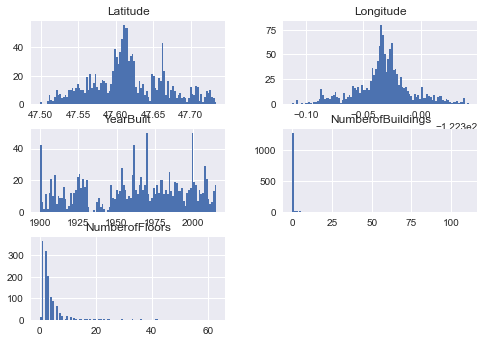

In [33]:
# Tracé des variables quantitatives avant recalibrage
plt.style.use('seaborn')
X_train_EUI[liste_variables_quantitatives].hist(bins=100)#, figsize=(22,15))
plt.show()

In [34]:
ss = StandardScaler()
X_train_EUI_ss = ss.fit_transform(X_train_EUI[liste_variables_quantitatives])

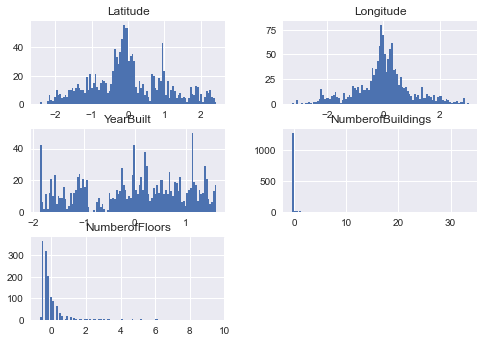

In [35]:
# Tracé des variables quantitatives après recalibrage
df_ss = pd.DataFrame(X_train_EUI_ss, columns=liste_variables_quantitatives)

plt.style.use('seaborn')
df_ss.hist(bins=100)
plt.show()

## Pipeline (imputation, one-hot encoding, recalibrage)

On combine les opérations décrites dans les chapitres précédents (imputation, one-hot encoding, recalibrage) en un workflow automatisé.

In [36]:
# On rappelle les jeux de train/test avant modification (puisqu'ils ont été modifiés dans les chapitres précédents (imputation, one-hot encoding, recalibrage)).
X_train_EUI = df_train[liste_variables_pour_modelisation].copy()
X_test_EUI = df_test[liste_variables_pour_modelisation].copy()
y_train_EUI = df_train[['SiteEUI(kBtu/sf)']].copy()
y_test_EUI = df_test[['SiteEUI(kBtu/sf)']].copy()

### Pipeline variables quantitatives

In [37]:
pipeline_quanti = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', StandardScaler()),
    ])

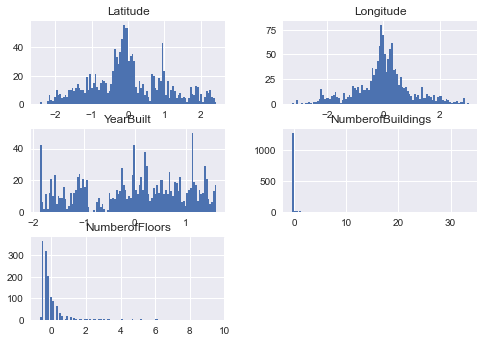

In [38]:
# test du pipeline
X_train_EUI_quanti = pipeline_quanti.fit_transform(X_train_EUI[liste_variables_quantitatives])

# Tracé des variables quantitatives après pipeline
df_quanti = pd.DataFrame(X_train_EUI_quanti, columns=liste_variables_quantitatives)
plt.style.use('seaborn')
df_quanti.hist(bins=100)
plt.show()

OK, on retrouve les mêmes histogrammes avec un pipeline.

### Pipeline variables qualitatives

L'imputer SimpleImputer de sklearn a un défaut de conception : lorsque le dataframe contient des données de type différents (string et numérique), les colonnes numériques sont imputées avec des strings.
Ce qui fait ensuiter bugger OneHotEncoder.
Il faut donc créer un imputeur maison et en faire un transformateur compatible avec un pipeline.

In [39]:
def Remplace_NA(df=None):
    """ Pour chaque variable, on remplace les valeurs null par une même valeur :  
      * 'ND' pour les strings,  
      * -1 pour les variables numériques.
    Args :
    - df : un dataframe.
    Returns : 
    - dff : le dataframe sans valeur null.
    """
    dff = df.copy()
    for var in liste_variables_qualitatives:
        if dff[var].dtype == 'object' :
            dff[var] = dff[var].fillna(value='ND', inplace=False)
        else :
            dff[var] = dff[var].fillna(value=-1, inplace=False)
    return dff
            
MonImputeur = FunctionTransformer(Remplace_NA)

In [40]:
pipeline_quali = Pipeline([
        ('imputer', MonImputeur),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

### Union des pipelines (ColumnTransformer)

In [41]:
full_pipeline = ColumnTransformer([
        ("pipe quanti", pipeline_quanti, liste_variables_quantitatives),
        ("pipe quali", pipeline_quali, liste_variables_qualitatives)
    ])

X_train_EUI_prepared = full_pipeline.fit_transform(X_train_EUI)
X_test_EUI_prepared = full_pipeline.transform(X_test_EUI)

X_train_EUI_prepared

<1319x239 sparse matrix of type '<class 'numpy.float64'>'
	with 17147 stored elements in Compressed Sparse Row format>

In [42]:
# visualisation du pipeline
# set_config(display='diagram')
full_pipeline

ColumnTransformer(transformers=[('pipe quanti',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Latitude', 'Longitude', 'YearBuilt',
                                  'NumberofBuildings', 'NumberofFloors']),
                                ('pipe quali',
                                 Pipeline(steps=[('imputer',
                                                  FunctionTransformer(func=<function Remplace_NA at 0x000000000B82BC10>)),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['BuildingType', 'PrimaryPropertyType',
                                  'ZipCode', 'CouncilDistrictCode',
                                  'Neighborhood', 'LargestPropertyUseType',
                                  'SecondLargestPropertyUseType',
                                  'ThirdLargestPropertyUseType'])])

## Dummy Regressor

##### Cross validation

In [43]:
dum_reg = DummyRegressor(strategy='mean')
dum_scores = cross_val_score(dum_reg, X_train_EUI_prepared, y_train_EUI,
                             scoring="r2", cv=5)
display_scores(dum_scores, 2)

Scores: -2e-05 -0.011 -0.00094 -0.01 -0.00017 
Mean: -0.0045
Standard deviation: 0.0057


## Régressions linéaires

### Régression linéaire simple

In [44]:
lin_reg = LinearRegression()

# Entrainement
lin_reg.fit(X_train_EUI_prepared, y_train_EUI)

LinearRegression()

##### Test de quelques valeurs prédites

In [45]:
some_data = X_train_EUI.iloc[:100]
some_labels = y_train_EUI.iloc[:100].copy()
some_data_prepared = full_pipeline.transform(some_data)
some_data_predicted = lin_reg.predict(some_data_prepared)

some_labels['Prédictions'] = some_data_predicted
some_labels.head(10)

,SiteEUI(kBtu/sf),Prédictions
2447,9.100000,48.767303
2559,81.300003,42.039337
137,33.299999,38.556516
1969,33.500000,30.452130
446,30.900000,92.408572
1519,319.600006,241.338602
3317,52.099998,64.988353
1197,63.400002,81.811360
530,52.299999,35.112925
245,69.599998,73.594738


#### Metrics

##### RMSE :

In [46]:
EUI_predictions = lin_reg.predict(X_train_EUI_prepared)
lin_mse = mean_squared_error(y_train_EUI, EUI_predictions)
lin_rmse = np.sqrt(lin_mse)
arrondi(lin_rmse)

45.0

##### MAE :

In [47]:
lin_mae = mean_absolute_error(y_train_EUI, EUI_predictions)
arrondi(lin_mae)

28.3

##### R² :

In [48]:
#R² par la méthode score() du transformateur
arrondi(lin_reg.score(X_train_EUI_prepared, y_train_EUI))

0.642

In [49]:
#R² par la fonction r2_score de metrics
arrondi(r2_score(y_train_EUI, EUI_predictions))

0.642

#### Scatter plot

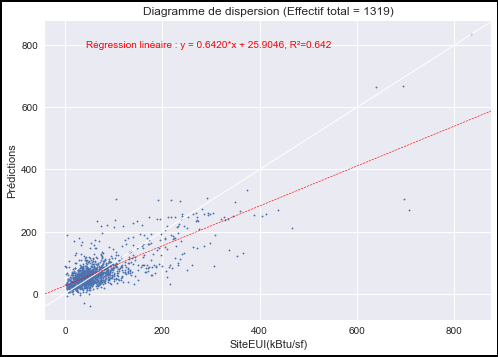

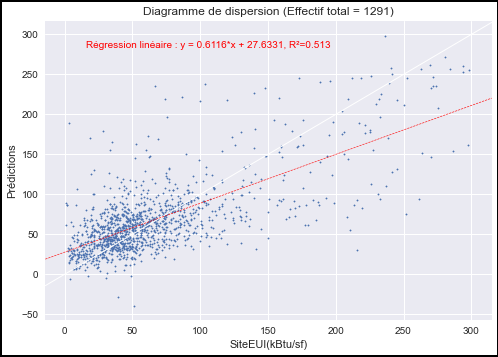

In [50]:
ser_predictions = pd.Series(np.squeeze(EUI_predictions), name='Prédictions')
scatter_plot(ser_x=y_train_EUI.reset_index().iloc[:,1], ser_y=ser_predictions, alpha=1, droite_identite=True)
scatter_plot(ser_x=y_train_EUI.reset_index().iloc[:,1], ser_y=ser_predictions, alpha=1, max_x=300, max_y=300, droite_identite=True)

#### Analyse des paramètres du modèle

In [51]:
arrondi(lin_reg.intercept_)

[108]

In [52]:
print("lin_reg.coef_ shape :", lin_reg.coef_.shape)
coefs = lin_reg.coef_

lin_reg.coef_ shape : (1, 239)


In [53]:
modalites_var_quali = full_pipeline.named_transformers_['pipe quali'].named_steps['encoder'].get_feature_names(input_features=liste_variables_qualitatives)
modalites_var_quali

array(['BuildingType_Campus', 'BuildingType_NonResidential', 'BuildingType_Nonresidential COS', 'BuildingType_Nonresidential WA',
       'BuildingType_SPS-District K-12', 'PrimaryPropertyType_Distribution Center', 'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory', 'PrimaryPropertyType_Large Office', 'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office', 'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office', 'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse', 'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store', 'PrimaryPropertyType_Self-Storage Facility', 'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office', 'PrimaryPropertyType_Supermarket / Grocery Store', 'PrimaryPropertyType_University',
       'PrimaryPropert

In [54]:
noms_des_coefs = np.concatenate([liste_variables_quantitatives, modalites_var_quali])

In [55]:
noms_des_coefs

array(['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'BuildingType_Campus', 'BuildingType_NonResidential',
       'BuildingType_Nonresidential COS', 'BuildingType_Nonresidential WA', 'BuildingType_SPS-District K-12', 'PrimaryPropertyType_Distribution Center',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large Office', 'PrimaryPropertyType_Low-Rise Multifamily', 'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office', 'PrimaryPropertyType_Other', 'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant', 'PrimaryPropertyType_Retail Store', 'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community', 'PrimaryPropertyType_Small- and Mid-Sized Office', 'PrimaryPropertyType_Supermark

##### Tous les coefs

In [56]:
# affichage de tous les coefs
df_coefs = pd.DataFrame(coefs.T, columns=['Coef'], index=noms_des_coefs)
with pd.option_context('display.max_rows', 300, 'display.max_colwidth', None, 'display.max_columns', 100, 'display.precision', 1) :
    display(df_coefs.sort_values(by='Coef', ascending=False))

,Coef
LargestPropertyUseType_Data Center,564.5
PrimaryPropertyType_Supermarket / Grocery Store,214.7
PrimaryPropertyType_Laboratory,193.9
ZipCode_98185.0,173.6
Neighborhood_Delridge,147.7
LargestPropertyUseType_Restaurant,145.3
LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,137.8
LargestPropertyUseType_Other/Specialty Hospital,126.3
SecondLargestPropertyUseType_Data Center,106.5
ThirdLargestPropertyUseType_Laboratory,105.1


##### Coefs des vars quantitatives

In [57]:
df_coefs.loc[liste_variables_quantitatives]

,Coef
Latitude,-0.313027
Longitude,5.518521
YearBuilt,2.101408
NumberofBuildings,0.735532
NumberofFloors,-0.643915


#### Cross validation

In [58]:
lin_scores = cross_val_score(lin_reg, X_train_EUI_prepared, y_train_EUI,
                             scoring="neg_root_mean_squared_error", cv=5)
display_scores(-lin_scores)

Scores: 62.7 67.1 50.2 65.9 62.0 
Mean: 61.6
Standard deviation: 6.72


In [59]:
lin_scores = cross_val_score(lin_reg, X_train_EUI_prepared, y_train_EUI,
                             scoring="r2", cv=5)
display_scores(lin_scores)

Scores: 0.325 0.472 0.479 -0.0987 0.246 
Mean: 0.285
Standard deviation: 0.236


#### Généralisation du modèle sur y_test

In [60]:
EUI_predictions = lin_reg.predict(X_test_EUI_prepared)
print(arrondi(r2_score(y_test_EUI, EUI_predictions)))

0.269


Conclusion sur la régression linéaire simple :  
- On passe de RMSE=45 (validation sur le jeu d'entraînement) à 62 (validation croisée) en moyenne.  
- On passe de R²=0.64 (validation sur le jeu d'entraînement) à 0.28 (validation croisée) en moyenne.  
- On passe de R² = 0.28 (validation croisée) à 0.27 (généralisation sur le test set).
- La généralisation se passe bien mais le modèle est peu prédictif.

### Régression linéaire avec transformation de y_train

#### Transformation = QuantileTransformer

In [61]:
transformer = QuantileTransformer(output_distribution='normal')
regressor = LinearRegression()
regr_ttr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)

# Entrainement
regr_ttr.fit(X_train_EUI_prepared, y_train_EUI)

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=QuantileTransformer(output_distribution='normal'))

In [62]:
# Test de quelques valeurs prédites
some_data_predicted_ttr = regr_ttr.predict(some_data_prepared)

some_labels['Prédictions_ttr'] = some_data_predicted_ttr
some_labels.head(20)

,SiteEUI(kBtu/sf),Prédictions,Prédictions_ttr
2447,9.100000,48.767303,41.500000
2559,81.300003,42.039337,42.099998
137,33.299999,38.556516,41.099998
1969,33.500000,30.452130,33.806538
446,30.900000,92.408572,67.048560
1519,319.600006,241.338602,225.471953
3317,52.099998,64.988353,69.785173
1197,63.400002,81.811360,80.934457
530,52.299999,35.112925,37.932778
245,69.599998,73.594738,58.200001


##### RMSE :

In [63]:
EUI_predictions = regr_ttr.predict(X_train_EUI_prepared)
lin_mse = mean_squared_error(y_train_EUI, EUI_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

47.5226715659295

##### R²

In [64]:
#R² par la méthode score() du transformateur
regr_ttr.score(X_train_EUI_prepared, y_train_EUI)

0.601458422690136

In [65]:
#R² par la fonction r2_score de metrics
r2_score(y_train_EUI, EUI_predictions)

0.601458422690136

##### Scatter plot :

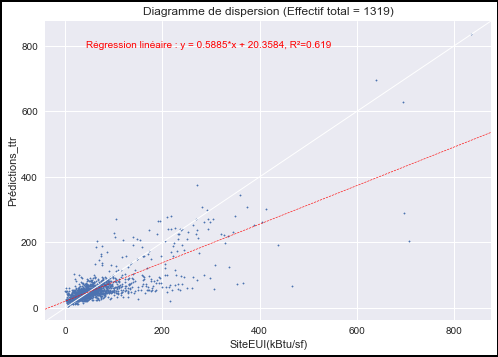

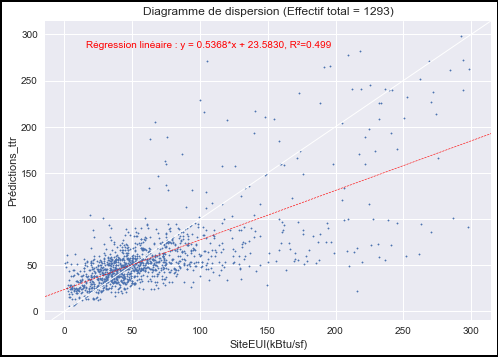

In [66]:
ser_predictions = pd.Series(np.squeeze(EUI_predictions), name='Prédictions_ttr')
scatter_plot(ser_x=y_train_EUI.reset_index().iloc[:,1], ser_y=ser_predictions, alpha=1, droite_identite=True)
scatter_plot(ser_x=y_train_EUI.reset_index().iloc[:,1], ser_y=ser_predictions, alpha=1, max_x=300, max_y=300, droite_identite=True)

Il n'y a pas eu d'amélioration par l'ajout d'une transformation de y_train via QuantileTransformer.

#### Transformation = fonction log

In [67]:
regressor = LinearRegression()
regr_ttr2 = TransformedTargetRegressor(regressor=regressor, func=np.log, inverse_func=np.exp)

# Entrainement
regr_ttr2.fit(X_train_EUI_prepared, y_train_EUI)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

In [68]:
# Test de quelques valeurs prédites
some_data_predicted_ttr = regr_ttr2.predict(some_data_prepared)

some_labels['Prédictions_ttr2'] = some_data_predicted_ttr
some_labels.head(20)

,SiteEUI(kBtu/sf),Prédictions,Prédictions_ttr,Prédictions_ttr2
2447,9.100000,48.767303,41.500000,36.706007
2559,81.300003,42.039337,42.099998,38.709525
137,33.299999,38.556516,41.099998,40.304150
1969,33.500000,30.452130,33.806538,26.591912
446,30.900000,92.408572,67.048560,72.088897
1519,319.600006,241.338602,225.471953,208.523512
3317,52.099998,64.988353,69.785173,69.357724
1197,63.400002,81.811360,80.934457,80.464884
530,52.299999,35.112925,37.932778,33.467501
245,69.599998,73.594738,58.200001,59.593172


##### RMSE :

In [69]:
EUI_predictions = regr_ttr2.predict(X_train_EUI_prepared)
lin_mse = mean_squared_error(y_train_EUI, EUI_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

47.262093708057606

##### R²

In [70]:
#R² par la méthode score() du transformateur
regr_ttr2.score(X_train_EUI_prepared, y_train_EUI)

0.6058170324729131

In [71]:
#R² par la fonction r2_score de metrics
r2_score(y_train_EUI, EUI_predictions)

0.6058170324729131

##### Scatter plot :

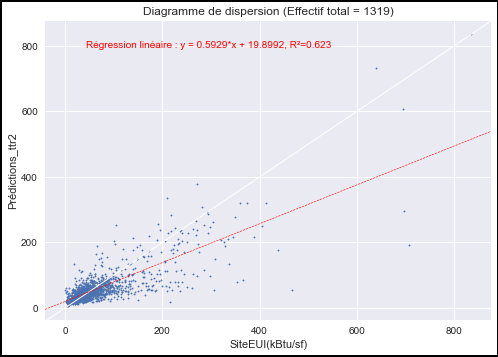

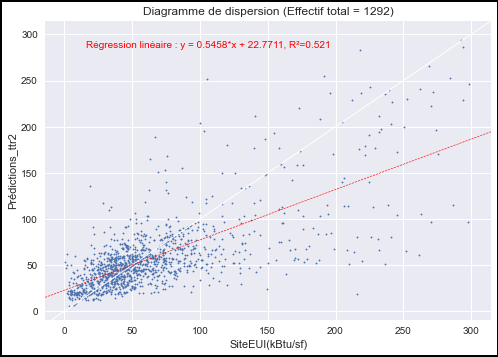

In [72]:
ser_predictions = pd.Series(np.squeeze(EUI_predictions), name='Prédictions_ttr2')
scatter_plot(ser_x=y_train_EUI.reset_index().iloc[:,1], ser_y=ser_predictions, alpha=1, droite_identite=True)
scatter_plot(ser_x=y_train_EUI.reset_index().iloc[:,1], ser_y=ser_predictions, alpha=1, max_x=300, max_y=300, droite_identite=True)

Il n'y a pas eu d'amélioration par l'ajout d'une transformation de y_train via un scaler en log.

## Arbres de décision

##### Validation sur le jeu d'entrainement

In [73]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train_EUI_prepared, y_train_EUI)

DecisionTreeRegressor(random_state=0)

In [74]:
EUI_predictions = tree_reg.predict(X_train_EUI_prepared)
tree_mse = mean_squared_error(y_train_EUI, EUI_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse  

1.2288822142936575

In [75]:
print("R² =", r2_score(y_train_EUI, EUI_predictions))

R² = 0.9997335029179526


RMSE = 0 et R² = 1 car car test sur jeu d'entrainement d'un arbre totalement ajusté

In [76]:
tree_reg.max_features_

239

In [77]:
tree_reg.n_features_

239

In [78]:
df_feature_importances = pd.Series(tree_reg.feature_importances_, index=noms_des_coefs)
df_feature_importances.sort_values(ascending=False).head(20)

LargestPropertyUseType_Data Center                              0.170312
PrimaryPropertyType_Supermarket / Grocery Store                 0.136531
YearBuilt                                                       0.091894
PrimaryPropertyType_Laboratory                                  0.066577
Longitude                                                       0.060178
Latitude                                                        0.053045
LargestPropertyUseType_Parking                                  0.041858
NumberofFloors                                                  0.026625
PrimaryPropertyType_Warehouse                                   0.022683
Neighborhood_Delridge                                           0.021844
PrimaryPropertyType_Other                                       0.017568
LargestPropertyUseType_Hospital (General Medical & Surgical)    0.017326
LargestPropertyUseType_Restaurant                               0.017218
SecondLargestPropertyUseType_Data Center           

##### RMSE / validation croisée

In [79]:
scores = cross_val_score(tree_reg, X_train_EUI_prepared, y_train_EUI, 
                         scoring="neg_root_mean_squared_error", cv=5)
display_scores(-scores)

Scores: 72.8 71.9 76.5 68.3 68.9 
Mean: 71.7
Standard deviation: 3.31


##### R² / validation croisée

In [80]:
scores = cross_val_score(tree_reg, X_train_EUI_prepared, y_train_EUI, 
                         scoring="r2", cv=5)
display_scores(scores)

Scores: 0.0915 0.394 -0.211 -0.182 0.0688 
Mean: 0.0323
Standard deviation: 0.246


On passe de RMSE=1 (validation sur le jeu d'entraînement) à 72 (validation croisée) en moyenne.  
On passe de R²=1 (validation sur le jeu d'entraînement) à 0.03 (validation croisée) en moyenne.  
La validation croisée indique que le modèle est très mauvais (surajustement).

##### Dessin de l'arbre

In [81]:
export_graphviz(
        tree_reg,
        out_file="tree_reg.dot",
        feature_names=noms_des_coefs,
        class_names="SiteEUI(kBtu/sf)",
        rounded=True,
        filled=True
    )

In [82]:
# Source.from_file("tree_reg.dot")   # l'affichage du graphe augmente la taille du fichier .ipynb de 3 Mo

In [83]:
tree_reg.get_n_leaves()

1312

In [84]:
tree_reg.get_depth()

56

### Régularisation

##### GridSearchCV à une dimension :

In [85]:
param_grid = [{'max_depth': [1, 2, 4, 8, 16, 32, 64, 128]}, {'min_samples_leaf': [2**x for x in range(11)]}, {'max_features': [32, 64, 128, 239]}]
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='r2', return_train_score=True)
grid_search.fit(X_train_EUI_prepared, y_train_EUI.iloc[:,0])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid=[{'max_depth': [1, 2, 4, 8, 16, 32, 64, 128]},
                         {'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 128, 256,
                                               512, 1024]},
                         {'max_features': [32, 64, 128, 239]}],
             return_train_score=True, scoring='r2')

In [86]:
grid_search.best_params_

{'max_depth': 8}

In [87]:
grid_search.best_score_

0.28660529930392975

In [88]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("R² =", arrondi(mean_score), params)

R² = 0.146 {'max_depth': 1}
R² = 0.277 {'max_depth': 2}
R² = 0.277 {'max_depth': 4}
R² = 0.287 {'max_depth': 8}
R² = 0.234 {'max_depth': 16}
R² = -0.0142 {'max_depth': 32}
R² = 0.0352 {'max_depth': 64}
R² = 0.0323 {'max_depth': 128}
R² = 0.0323 {'min_samples_leaf': 1}
R² = 0.127 {'min_samples_leaf': 2}
R² = 0.136 {'min_samples_leaf': 4}
R² = 0.199 {'min_samples_leaf': 8}
R² = 0.194 {'min_samples_leaf': 16}
R² = 0.0612 {'min_samples_leaf': 32}
R² = 0.0797 {'min_samples_leaf': 64}
R² = 0.0497 {'min_samples_leaf': 128}
R² = 0.0236 {'min_samples_leaf': 256}
R² = -0.0043 {'min_samples_leaf': 512}
R² = -0.00455 {'min_samples_leaf': 1024}
R² = -0.0394 {'max_features': 32}
R² = 0.115 {'max_features': 64}
R² = -0.0129 {'max_features': 128}
R² = 0.0323 {'max_features': 239}


Le meilleur R² issu du GridSearch est médiocre.

##### GridSearchCV à plusieurs dimensions :

In [89]:
param_grid = [{'max_depth': [4, 8, 16, 32, 64], 'min_samples_leaf': [1, 2, 4, 8], 'max_features': [64, 128, 239]}]

In [90]:
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='r2', return_train_score=True, n_jobs=7)
grid_search.fit(X_train_EUI_prepared, y_train_EUI.iloc[:,0])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=7,
             param_grid=[{'max_depth': [4, 8, 16, 32, 64],
                          'max_features': [64, 128, 239],
                          'min_samples_leaf': [1, 2, 4, 8]}],
             return_train_score=True, scoring='r2')

In [91]:
grid_search.best_params_

{'max_depth': 4, 'max_features': 128, 'min_samples_leaf': 2}

In [92]:
affichage_tri_r2(grid_search.cv_results_)

R² =    0.288 {'max_depth': 4, 'max_features': 128, 'min_samples_leaf': 2}
R² =    0.287 {'max_depth': 8, 'max_features': 64, 'min_samples_leaf': 2}
R² =    0.287 {'max_depth': 8, 'max_features': 239, 'min_samples_leaf': 1}
R² =    0.281 {'max_depth': 4, 'max_features': 128, 'min_samples_leaf': 1}
R² =    0.277 {'max_depth': 4, 'max_features': 239, 'min_samples_leaf': 1}
R² =    0.273 {'max_depth': 8, 'max_features': 239, 'min_samples_leaf': 2}
R² =    0.272 {'max_depth': 4, 'max_features': 239, 'min_samples_leaf': 2}
R² =     0.27 {'max_depth': 16, 'max_features': 64, 'min_samples_leaf': 2}
R² =    0.251 {'max_depth': 8, 'max_features': 64, 'min_samples_leaf': 4}
R² =     0.25 {'max_depth': 8, 'max_features': 128, 'min_samples_leaf': 2}
R² =    0.239 {'max_depth': 8, 'max_features': 128, 'min_samples_leaf': 8}
R² =    0.234 {'max_depth': 16, 'max_features': 239, 'min_samples_leaf': 1}
R² =    0.227 {'max_depth': 4, 'max_features': 239, 'min_samples_leaf': 8}
R² =    0.225 {'max_depth'

In [93]:
# Généralisation sur le test set
EUI_predictions = grid_search.predict(X_test_EUI_prepared)
print("R² =", r2_score(y_test_EUI, EUI_predictions))

R² = 0.07073282296818817


La généralisation fait à peine mieux qu'un DummyRegressor.

## Forêts aléatoires

In [94]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train_EUI_prepared, y_train_EUI.iloc[:,0])

RandomForestRegressor(random_state=0)

In [95]:
forest_scores = cross_val_score(forest_reg, X_train_EUI_prepared, y_train_EUI.iloc[:,0],
                                scoring="neg_root_mean_squared_error", cv=5)
display_scores(-forest_scores)

Scores: 55.4 62.3 47.5 51.0 55.8 
Mean: 54.4
Standard deviation: 5.58


In [96]:
forest_scores = cross_val_score(forest_reg, X_train_EUI_prepared, y_train_EUI.iloc[:,0],
                                scoring="r2", cv=5)
display_scores(forest_scores)

Scores: 0.473 0.544 0.534 0.34 0.39 
Mean: 0.456
Standard deviation: 0.0893


C'est encourageant.

### Régularisation

##### GridSearchCV à une dimension :

In [97]:
param_grid = [{'max_depth': [2, 4, 8, 16, 32, 64]}, {'min_samples_leaf': [2**x for x in range(8)]}, {'max_features': [8, 16, 32, 64, 128, 239]}]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='r2', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_EUI_prepared, y_train_EUI.iloc[:,0])

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid=[{'max_depth': [2, 4, 8, 16, 32, 64]},
                         {'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 128]},
                         {'max_features': [8, 16, 32, 64, 128, 239]}],
             return_train_score=True, scoring='r2')

In [98]:
grid_search.best_params_

{'max_features': 128}

In [99]:
grid_search.best_score_

0.4625099787785931

In [100]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("R² =", arrondi(mean_score), params)

R² = 0.281 {'max_depth': 2}
R² = 0.335 {'max_depth': 4}
R² = 0.393 {'max_depth': 8}
R² = 0.442 {'max_depth': 16}
R² = 0.452 {'max_depth': 32}
R² = 0.457 {'max_depth': 64}
R² = 0.456 {'min_samples_leaf': 1}
R² = 0.417 {'min_samples_leaf': 2}
R² = 0.365 {'min_samples_leaf': 4}
R² = 0.284 {'min_samples_leaf': 8}
R² = 0.267 {'min_samples_leaf': 16}
R² = 0.133 {'min_samples_leaf': 32}
R² = 0.105 {'min_samples_leaf': 64}
R² = 0.0409 {'min_samples_leaf': 128}
R² = 0.401 {'max_features': 8}
R² = 0.417 {'max_features': 16}
R² = 0.453 {'max_features': 32}
R² = 0.461 {'max_features': 64}
R² = 0.463 {'max_features': 128}
R² = 0.456 {'max_features': 239}


Pour les mêmes jeux de paramètres param_grid, RandomForestRegressor est plus performant que DecisionTreeRegressor.

##### GridSearchCV à plusieurs dimensions :

In [101]:
param_grid = [{'max_depth': [16, 32, 64], 'min_samples_leaf': [1, 2, 3], 'max_features': [8, 16, 32, 64, 128]}]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='r2', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_EUI_prepared, y_train_EUI.iloc[:,0])

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid=[{'max_depth': [16, 32, 64],
                          'max_features': [8, 16, 32, 64, 128],
                          'min_samples_leaf': [1, 2, 3]}],
             return_train_score=True, scoring='r2')

In [102]:
grid_search.best_params_

{'max_depth': 32, 'max_features': 64, 'min_samples_leaf': 1}

In [103]:
affichage_tri_r2(grid_search.cv_results_)

R² =    0.467 {'max_depth': 32, 'max_features': 64, 'min_samples_leaf': 1}
R² =    0.467 {'max_depth': 32, 'max_features': 128, 'min_samples_leaf': 1}
R² =    0.463 {'max_depth': 64, 'max_features': 128, 'min_samples_leaf': 1}
R² =    0.462 {'max_depth': 32, 'max_features': 32, 'min_samples_leaf': 1}
R² =    0.461 {'max_depth': 64, 'max_features': 64, 'min_samples_leaf': 1}
R² =    0.457 {'max_depth': 16, 'max_features': 128, 'min_samples_leaf': 1}
R² =    0.454 {'max_depth': 64, 'max_features': 32, 'min_samples_leaf': 1}
R² =    0.452 {'max_depth': 16, 'max_features': 64, 'min_samples_leaf': 1}
R² =    0.444 {'max_depth': 16, 'max_features': 32, 'min_samples_leaf': 1}
R² =    0.433 {'max_depth': 64, 'max_features': 128, 'min_samples_leaf': 2}
R² =     0.43 {'max_depth': 32, 'max_features': 16, 'min_samples_leaf': 1}
R² =     0.43 {'max_depth': 32, 'max_features': 64, 'min_samples_leaf': 2}
R² =    0.429 {'max_depth': 64, 'max_features': 64, 'min_samples_leaf': 2}
R² =    0.429 {'max_d

##### Généralisation sur le test set

In [104]:
EUI_predictions = grid_search.predict(X_test_EUI_prepared)
print("R² =", arrondi(r2_score(y_test_EUI, EUI_predictions)))

R² = 0.331


La généralisation est médiocre.

In [105]:
df_feature_importances = pd.Series(forest_reg.feature_importances_, index=noms_des_coefs)
df_feature_importances.sort_values(ascending=False).head(20)

LargestPropertyUseType_Data Center                            0.141312
PrimaryPropertyType_Supermarket / Grocery Store               0.087568
PrimaryPropertyType_Laboratory                                0.069145
YearBuilt                                                     0.065247
LargestPropertyUseType_Supermarket/Grocery Store              0.051345
Latitude                                                      0.048752
Longitude                                                     0.046723
NumberofFloors                                                0.034135
SecondLargestPropertyUseType_Data Center                      0.027765
LargestPropertyUseType_Restaurant                             0.019055
PrimaryPropertyType_Other                                     0.018869
Neighborhood_Delridge                                         0.016675
ThirdLargestPropertyUseType_Swimming Pool                     0.015436
SecondLargestPropertyUseType_Office                           0.012224
Primar

## SVM Regressor

In [106]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train_EUI_prepared, y_train_EUI.iloc[:,0])

SVR(kernel='linear')

In [107]:
SVR_predictions = svm_reg.predict(X_train_EUI_prepared)
svm_mse = mean_squared_error(y_train_EUI, SVR_predictions)
svm_rmse = np.sqrt(svm_mse)
print("RMSE = ", svm_rmse)

RMSE =  68.68134300140864


C'est mauvais.